# rf301_composition
Multidimensional models: multi-dimensional pdfs through composition, e.g. substituting
a pdf parameter with a function that depends on other observables

`pdf = gauss(x,f(y),s)` with `f(y) = a0 + a1*y`




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:18 AM.</small></i>

In [1]:
import ROOT

Setup composed model gauss(x, m(y), s)
-----------------------------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)

Create function f(y) = a0 + a1*y

In [3]:
a0 = ROOT.RooRealVar("a0", "a0", -0.5, -5, 5)
a1 = ROOT.RooRealVar("a1", "a1", -0.5, -1, 1)
fy = ROOT.RooPolyVar("fy", "fy", y, [a0, a1])

Creat gauss(x,f(y),s)

In [4]:
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 0.5)
model = ROOT.RooGaussian("model", "Gaussian with shifting mean", x, fy, sigma)

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'model' exceeds the safe range of (0, inf). Advise to limit its range.


Sample data, plot data and pdf on x and y
---------------------------------------------------------------------------------

Generate 10000 events in x and y from model

In [5]:
data = model.generate({x, y}, 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot x distribution of data and projection of model x = Int(dy)
model(x,y)

In [6]:
xframe = x.frame()
data.plotOn(xframe)
model.plotOn(xframe)

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Plot x distribution of data and projection of model y = Int(dx)
model(x,y)

In [7]:
yframe = y.frame()
data.plotOn(yframe)
model.plotOn(yframe)

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make two-dimensional plot in x vs y

In [8]:
hh_model = model.createHistogram("hh_model", x, Binning=50, YVar=dict(var=y, Binning=50))
hh_model.SetLineColor(ROOT.kBlue)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make canvas and draw ROOT.RooPlots

In [9]:
c = ROOT.TCanvas("rf301_composition", "rf301_composition", 1200, 400)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
yframe.GetYaxis().SetTitleOffset(1.4)
yframe.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.20)
hh_model.GetZaxis().SetTitleOffset(2.5)
hh_model.Draw("surf")

c.SaveAs("rf301_composition.png")

Info in <TCanvas::Print>: png file rf301_composition.png has been created


Draw all canvases 

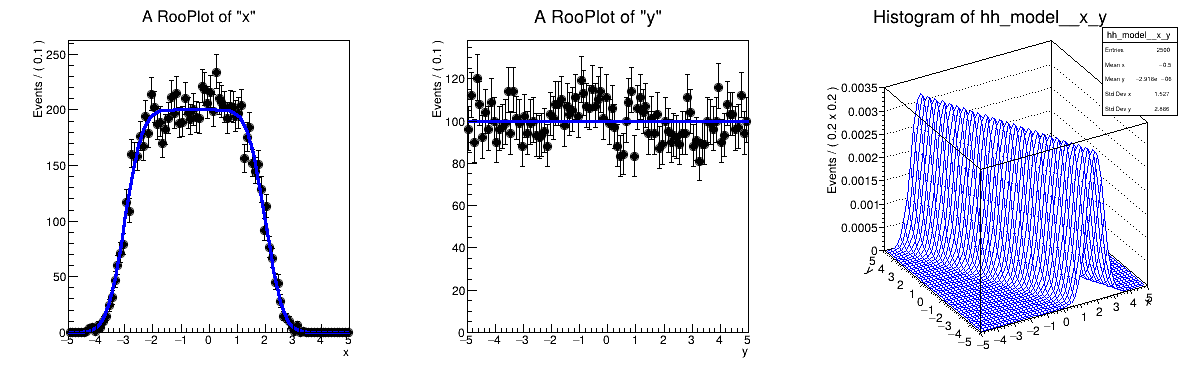

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()